In [5]:
!pip install tensorflow
!pip install keras
!pip install --user tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense

import os
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 378kB 641kB/s eta 0:00:01


Using TensorFlow backend.


In [6]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
#Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (150,150, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
from keras.layers import Flatten

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., activation="relu")`
  """
/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [9]:
training_set = train_datagen.flow_from_directory(directory= train_dir,
                                                 target_size = (150, 150),
                                                 shuffle= True,
                                                 batch_size = 128,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(directory= validation_dir,
                                            target_size = (150, 150),
                                            shuffle= True,
                                            batch_size = 128,
                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
dogcat= classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         nb_epoch = 20,
                         validation_data = test_set,
                         validation_steps = len(test_set))

/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=16, validation_data=<keras.pre..., validation_steps=8, epochs=20)`
  """


Epoch 1/20
16/16 [==============================] - 24s 2s/step - loss: 1.1824 - accuracy: 0.5060 - val_loss: 0.6953 - val_accuracy: 0.4990
Epoch 2/20
16/16 [==============================] - 23s 1s/step - loss: 0.6903 - accuracy: 0.5450 - val_loss: 0.6868 - val_accuracy: 0.5410
Epoch 3/20
16/16 [==============================] - 24s 1s/step - loss: 0.6803 - accuracy: 0.5655 - val_loss: 0.6804 - val_accuracy: 0.5290
Epoch 4/20
16/16 [==============================] - 26s 2s/step - loss: 0.6608 - accuracy: 0.6170 - val_loss: 0.6884 - val_accuracy: 0.5700
Epoch 5/20
16/16 [==============================] - 24s 2s/step - loss: 0.6338 - accuracy: 0.6475 - val_loss: 0.6369 - val_accuracy: 0.6140
Epoch 6/20
16/16 [==============================] - 23s 1s/step - loss: 0.6176 - accuracy: 0.6650 - val_loss: 0.6232 - val_accuracy: 0.6350
Epoch 7/20
16/16 [==============================] - 23s 1s/step - loss: 0.6172 - accuracy: 0.6615 - val_loss: 0.5831 - val_accuracy: 0.6650
Epoch 8/20
16/16 [==

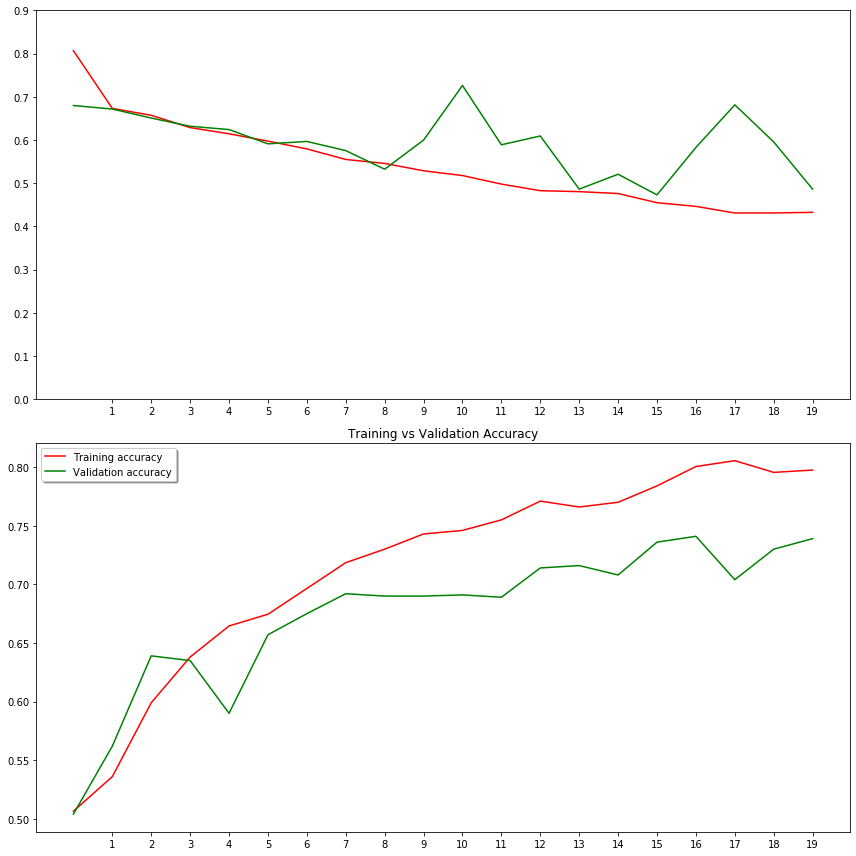

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(dogcat.history['loss'], color='r', label="Training loss")
ax1.plot(dogcat.history['val_loss'], color='g', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
plt.title('Training vs Validation Loss')

ax2.plot(dogcat.history['accuracy'], color='r', label="Training accuracy")
ax2.plot(dogcat.history['val_accuracy'], color='g',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))
plt.title('Training vs Validation Accuracy')

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [14]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (150,150, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.1))
from keras.layers import Flatten

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(0.1))
# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., activation="relu")`
  after removing the cwd from sys.path.
/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [15]:
training_set = train_datagen.flow_from_directory(directory= train_dir,
                                                 target_size = (150, 150),
                                                 shuffle= True,
                                                 batch_size = 128,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(directory= validation_dir,
                                            target_size = (150, 150),
                                            shuffle= True,
                                            batch_size = 128,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
dogcat= classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         nb_epoch = 20,
                         validation_data = test_set,
                         validation_steps = len(test_set))

/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=16, validation_data=<keras.pre..., validation_steps=8, epochs=20)`
  """


Epoch 1/20
16/16 [==============================] - 27s 2s/step - loss: 0.8042 - accuracy: 0.5065 - val_loss: 0.6798 - val_accuracy: 0.5040
Epoch 2/20
16/16 [==============================] - 26s 2s/step - loss: 0.6734 - accuracy: 0.5360 - val_loss: 0.6716 - val_accuracy: 0.5620
Epoch 3/20
16/16 [==============================] - 24s 2s/step - loss: 0.6578 - accuracy: 0.5990 - val_loss: 0.6507 - val_accuracy: 0.6390
Epoch 4/20
16/16 [==============================] - 24s 1s/step - loss: 0.6286 - accuracy: 0.6380 - val_loss: 0.6318 - val_accuracy: 0.6350
Epoch 5/20
16/16 [==============================] - 22s 1s/step - loss: 0.6147 - accuracy: 0.6645 - val_loss: 0.6241 - val_accuracy: 0.5900
Epoch 6/20
16/16 [==============================] - 23s 1s/step - loss: 0.5964 - accuracy: 0.6745 - val_loss: 0.5911 - val_accuracy: 0.6570
Epoch 7/20
16/16 [==============================] - 23s 1s/step - loss: 0.5798 - accuracy: 0.6965 - val_loss: 0.5967 - val_accuracy: 0.6750
Epoch 8/20
16/16 [==

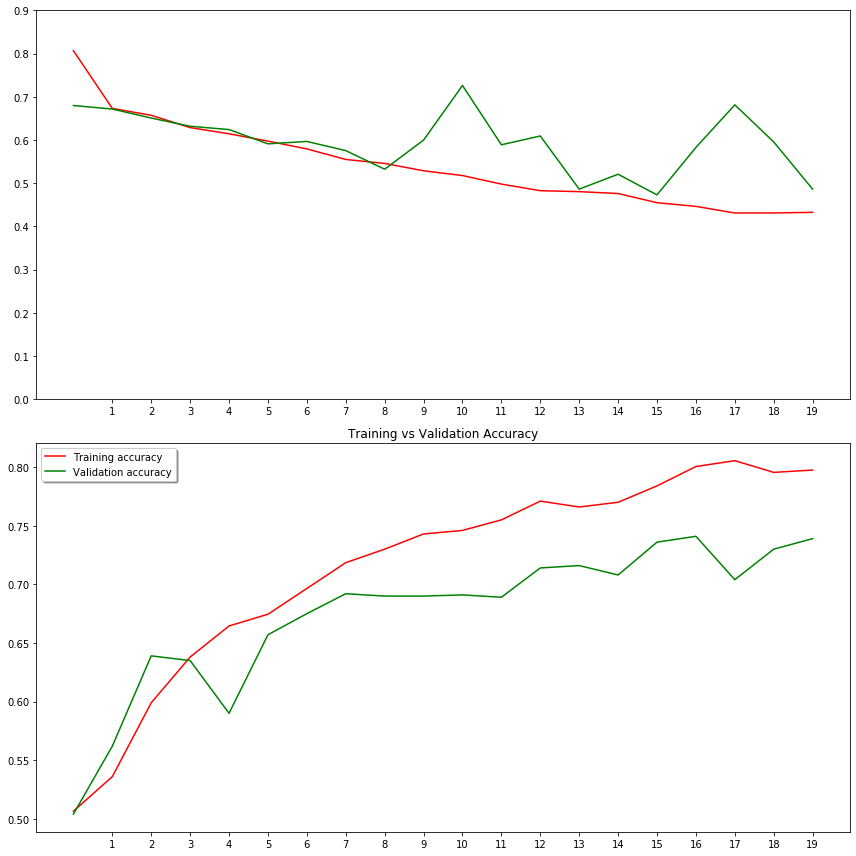

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(dogcat.history['loss'], color='r', label="Training loss")
ax1.plot(dogcat.history['val_loss'], color='g', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
plt.title('Training vs Validation Loss')

ax2.plot(dogcat.history['accuracy'], color='r', label="Training accuracy")
ax2.plot(dogcat.history['val_accuracy'], color='g',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))
plt.title('Training vs Validation Accuracy')

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

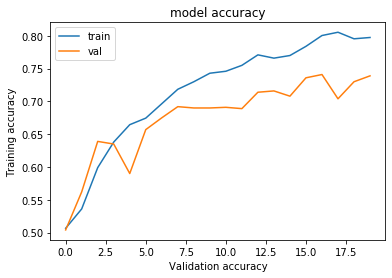

In [37]:
plt.plot(dogcat.history['accuracy'])
plt.plot(dogcat.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Training accuracy')
plt.xlabel('Validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

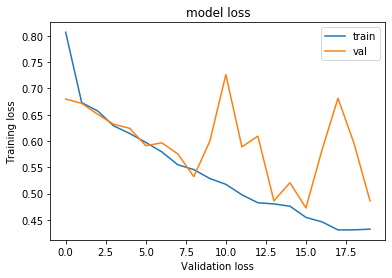

In [38]:
plt.plot(dogcat.history['loss'])
plt.plot(dogcat.history['val_loss'])
plt.title('model loss')
plt.ylabel('Training loss')
plt.xlabel('Validation loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()